In [107]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import MySQLdb
import datetime
from sklearn.metrics import auc, mean_squared_error

In [108]:
# убрать сегменты дальше Самары

mse = "221.6361805"

data = pd.read_excel('fpk_data/model/results_' + str(mse) + '.xls')
whole_res = pd.read_excel('fpk_data/model/whole_results_' + str(mse) + '.xls')

In [80]:
# %%time
# db_connection = MySQLdb.connect(host="194.247.15.117", 
#                      port=7806,
#                      user="bar",
#                      passwd="PASSWORD",
#                      db="Inventory")

# whole_data = pd.read_sql('SELECT * FROM Inventory.vTotalPassengers_v2', con=db_connection)
# db_connection.close()

In [81]:
# whole_data.sort_values(by=['fltNrDptDt', 'FlightID'], inplace=True)
# whole_data.drop(whole_data.index[whole_data.fltNrDptDt > datetime.date(2017, 3, 31)], axis = 0, inplace = True)
# whole_data.tail(25)

In [82]:
# whole_res['Date'] = whole_data[int(len(whole_data) * 0.9):].fltNrDptDt.values
whole_res.head(50)

,FlightID,Code,fltNrDptDt,DptTime,ArrTime,flightNrSf,segment,DayOfWeekDpt,WeekOfMonthDpt,MonthDpt,...,IsWeekendDpt,DayOfWeekArr,WeekOfMonthArr,MonthArr,QuarterArr,YearArr,IsWeekendArr,Holiday,actual,predictions
15776,44319,1,2017-03-27,20,3,0,0,0,5,3,...,0,1,5,3,1,2017,0,0,1,1
15777,44319,2,2017-03-27,20,3,0,0,0,5,3,...,0,1,5,3,1,2017,0,0,1,1
15778,44319,3,2017-03-27,20,3,0,0,0,5,3,...,0,1,5,3,1,2017,0,0,1,1
15779,44319,0,2017-03-27,20,7,0,1,0,5,3,...,0,1,5,3,1,2017,0,0,2,2
15780,44319,1,2017-03-27,20,7,0,1,0,5,3,...,0,1,5,3,1,2017,0,0,11,8
15781,44319,2,2017-03-27,20,7,0,1,0,5,3,...,0,1,5,3,1,2017,0,0,26,16
15782,44319,3,2017-03-27,20,7,0,1,0,5,3,...,0,1,5,3,1,2017,0,0,8,11
15783,44319,0,2017-03-27,20,9,0,2,0,5,3,...,0,1,5,3,1,2017,0,0,8,8
15784,44319,1,2017-03-27,20,9,0,2,0,5,3,...,0,1,5,3,1,2017,0,0,25,29
15785,44319,2,2017-03-27,20,9,0,2,0,5,3,...,0,1,5,3,1,2017,0,0,72,92


In [83]:
# plt.figure(figsize=(20, 10))
# x = np.arange(0, len(whole_res[:50]))
# fn =2
# code = 0
# plt.plot(x, whole_data[whole_res.flightNrSf == fn][whole_res.Code == code][:50].actual, 'r', x, whole_res[whole_res.flightNrSf == fn][whole_res.Code == code][:50].predictions, 'g')

In [84]:
res = whole_res.copy()
res_s = pd.DataFrame(columns = ("FlightID", "Code", "Date", "FltNr", "actual", "predictions"))
count = 0
for flightID in res.FlightID.unique():
    for code in res.Code[res.FlightID == flightID].unique():
        date = res.fltNrDptDt[res.FlightID == flightID][res.Code == code].values[0]
        fltNr = res.flightNrSf[res.FlightID == flightID][res.Code == code].values[0]
        res_s.loc[count] = (flightID, code, date, fltNr, sum(res.actual[res.FlightID == flightID][res.Code == code].values), sum(res.predictions[res.FlightID == flightID][res.Code == code].values))
        count += 1

In [109]:
# data = res_s.copy()
data.head()

,FlightID,Code,Date,FltNr,actual,predictions
0,44319,0,2017-03-27,0,10,11
1,44319,1,2017-03-27,0,38,42
2,44319,2,2017-03-27,0,99,102
3,44319,3,2017-03-27,0,76,84
4,44438,2,2017-03-27,1,73,58


In [110]:
data.sort_values(['FltNr', 'Date'], inplace = True)
data

,FlightID,Code,Date,FltNr,actual,predictions
292,139059,1,2017-03-14,0,1,0
293,139059,2,2017-03-14,0,0,3
294,139059,3,2017-03-14,0,0,2
274,128766,0,2017-03-15,0,10,12
275,128766,1,2017-03-15,0,51,48
276,128766,2,2017-03-15,0,137,114
277,128766,3,2017-03-15,0,101,98
140,98267,0,2017-03-16,0,10,11
141,98267,1,2017-03-16,0,43,48
142,98267,2,2017-03-16,0,112,110


In [111]:
len(data[data.FltNr == 0]), len(data[data.FltNr == 1]), len(data[data.FltNr == 2]), len(data[data.FltNr == 3]), len(data[data.FltNr == 4]), len(data[data.FltNr == 5]), len(data[data.FltNr == 6]), len(data[data.FltNr == 7]), len(data[data.FltNr == 8]), len(data[data.FltNr == 9]), len(data[data.FltNr == 10]), len(data[data.FltNr == 11])

(71, 52, 68, 54, 0, 0, 36, 36, 0, 0, 0, 0)

**9J, 10J**

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


9.86946047158


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


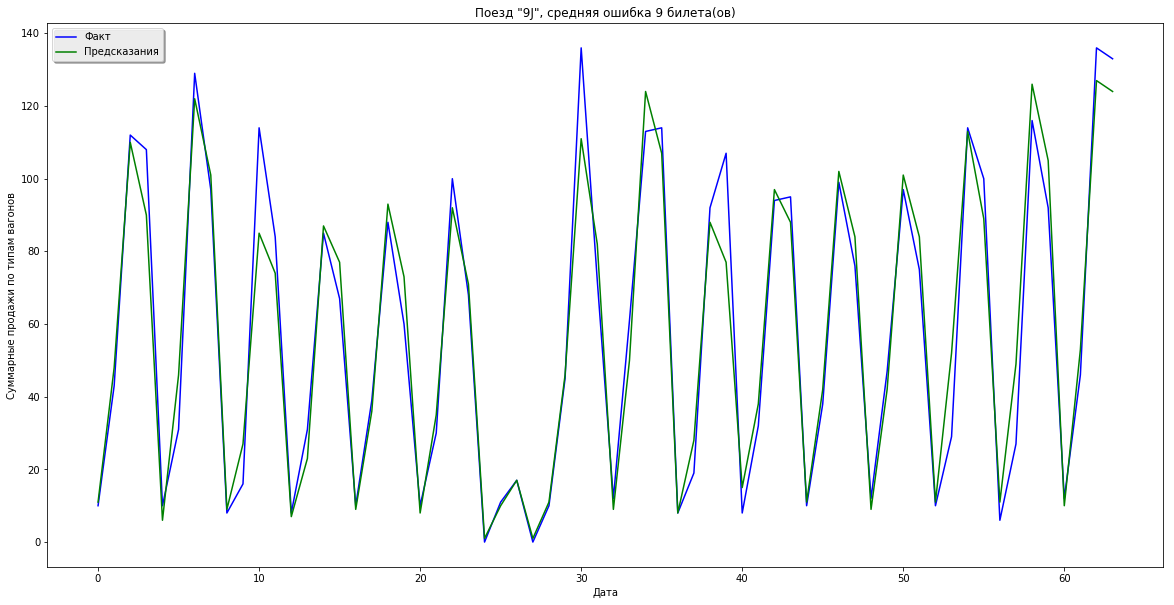

In [112]:
plt.figure(figsize=(20, 10))
fn = 0

x = np.arange(0, len(data[data.Date > '2017-03-15'][data.FltNr == fn]))

mse = np.sqrt(mean_squared_error(data[data.Date > '2017-03-15'][data.FltNr == fn].actual, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "9J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


11.8659175794


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


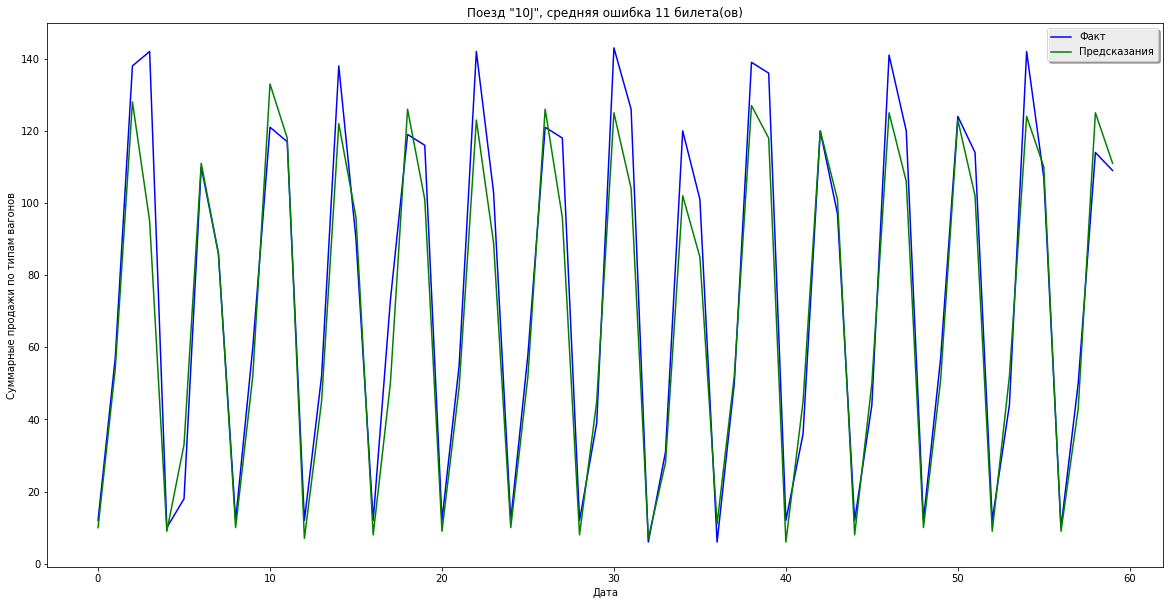

In [113]:
plt.figure(figsize=(20, 10))
fn = 2

x = np.arange(0, len(data[data.Date > '2017-03-15'][data.FltNr == fn]))

mse = np.sqrt(mean_squared_error(data[data.Date > '2017-03-15'][data.FltNr == fn].actual, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "10J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**49J, 50M**

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


90.8916152034


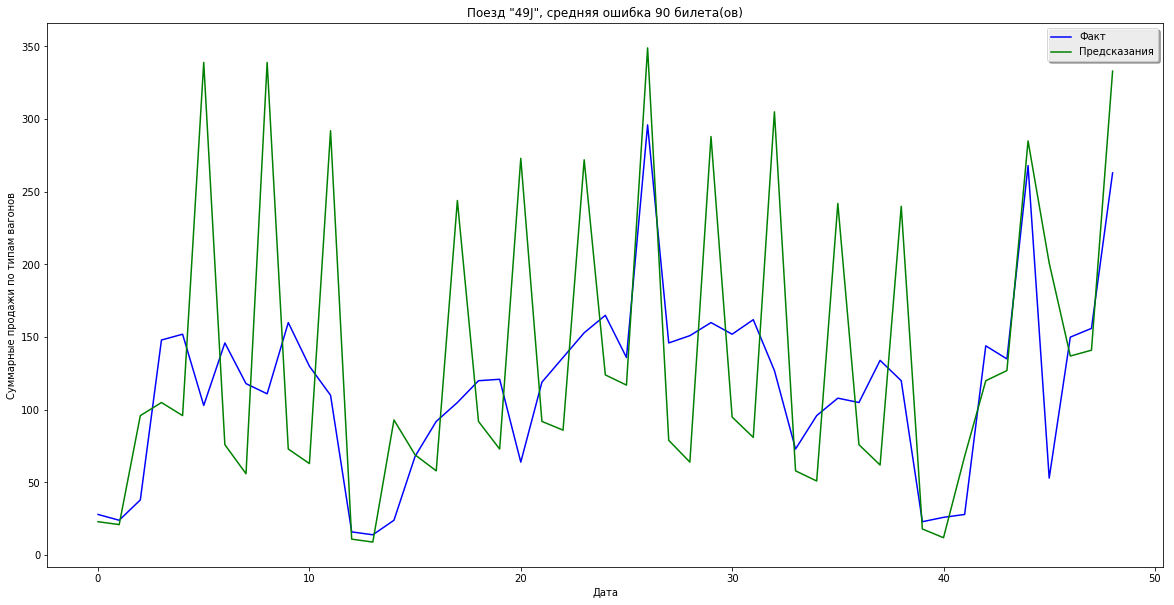

In [114]:
plt.figure(figsize=(20, 10))
fn = 1

x = np.arange(0, len(data[data.Date > '2017-03-15'][data.FltNr == fn]))

mse = np.sqrt(mean_squared_error(data[data.Date > '2017-03-15'][data.FltNr == fn].actual, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "49J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


98.1823346297


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


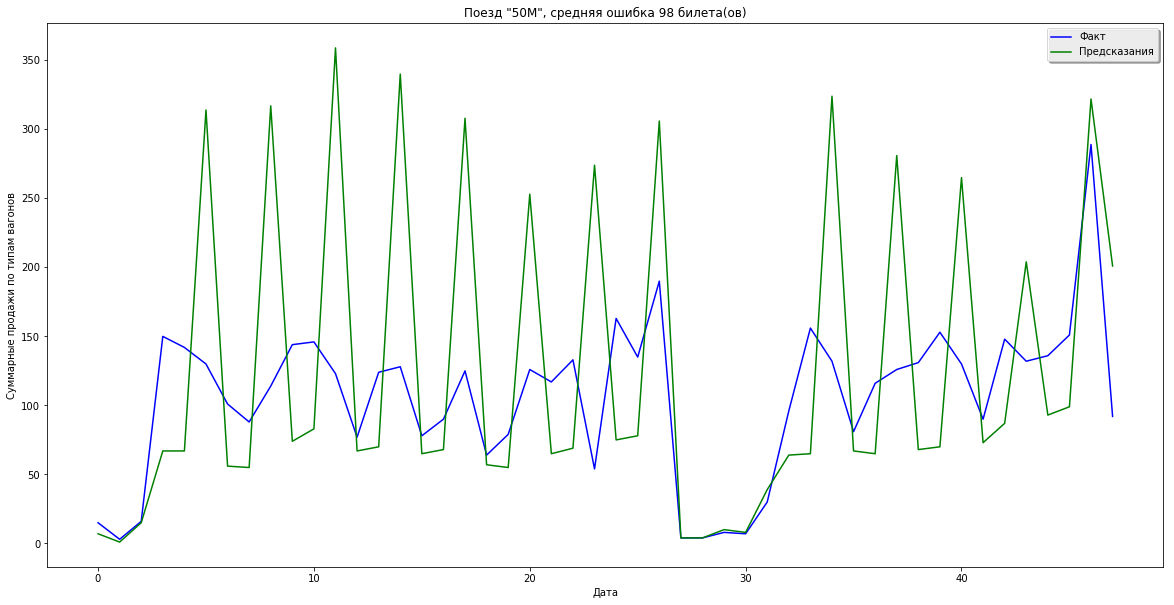

In [115]:
plt.figure(figsize=(20, 10))
fn = 3

x = np.arange(0, len(data[data.Date > '2017-03-15'][data.FltNr == fn]))

mse = np.sqrt(mean_squared_error(data[data.Date > '2017-03-15'][data.FltNr == fn].actual, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "50M", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**138J, 137YQ**

In [136]:
import matplotlib as mpl
import datetime

In [137]:
[mpl.dates.date2num(t) for t in data.Date]

[736402.0,
 736402.0,
 736402.0,
 736403.0,
 736403.0,
 736403.0,
 736403.0,
 736404.0,
 736404.0,
 736404.0,
 736404.0,
 736405.0,
 736405.0,
 736405.0,
 736405.0,
 736406.0,
 736406.0,
 736406.0,
 736406.0,
 736407.0,
 736407.0,
 736407.0,
 736407.0,
 736408.0,
 736408.0,
 736408.0,
 736408.0,
 736409.0,
 736409.0,
 736409.0,
 736409.0,
 736410.0,
 736410.0,
 736410.0,
 736410.0,
 736411.0,
 736411.0,
 736411.0,
 736411.0,
 736412.0,
 736412.0,
 736412.0,
 736412.0,
 736413.0,
 736413.0,
 736413.0,
 736413.0,
 736414.0,
 736414.0,
 736414.0,
 736414.0,
 736415.0,
 736415.0,
 736415.0,
 736415.0,
 736416.0,
 736416.0,
 736416.0,
 736416.0,
 736417.0,
 736417.0,
 736417.0,
 736417.0,
 736418.0,
 736418.0,
 736418.0,
 736418.0,
 736419.0,
 736419.0,
 736419.0,
 736419.0,
 736403.0,
 736403.0,
 736403.0,
 736404.0,
 736404.0,
 736404.0,
 736405.0,
 736405.0,
 736405.0,
 736406.0,
 736406.0,
 736406.0,
 736407.0,
 736407.0,
 736407.0,
 736408.0,
 736408.0,
 736408.0,
 736409.0,
 736409.0,

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


26.4764045897


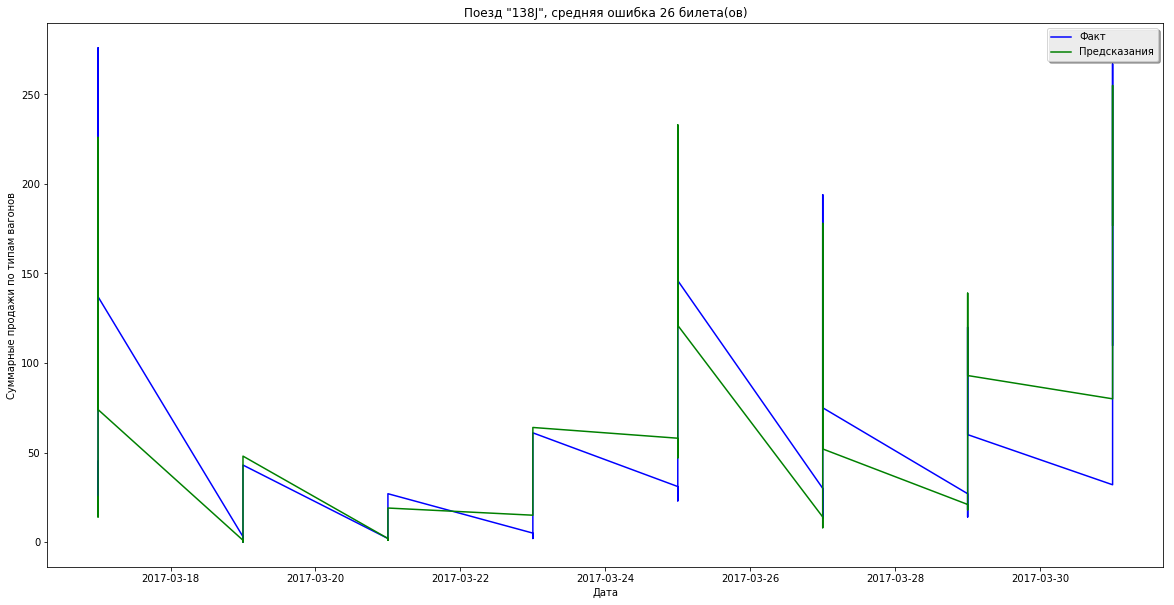

In [139]:
plt.figure(figsize=(20, 10))
fn = 6

x = np.arange(0, len(data[data.Date > '2017-03-15'][data.FltNr == fn]))
mse = np.sqrt(mean_squared_error(data[data.Date > '2017-03-15'][data.FltNr == fn].actual, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "138J", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot_date([mpl.dates.date2num(t) for t in data[data.Date > '2017-03-15'][data.FltNr == fn].Date], data[data.Date > '2017-03-15'][data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot_date([mpl.dates.date2num(t) for t in data[data.Date > '2017-03-15'][data.FltNr == fn].Date], data[data.Date > '2017-03-15'][data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


45.932695327


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


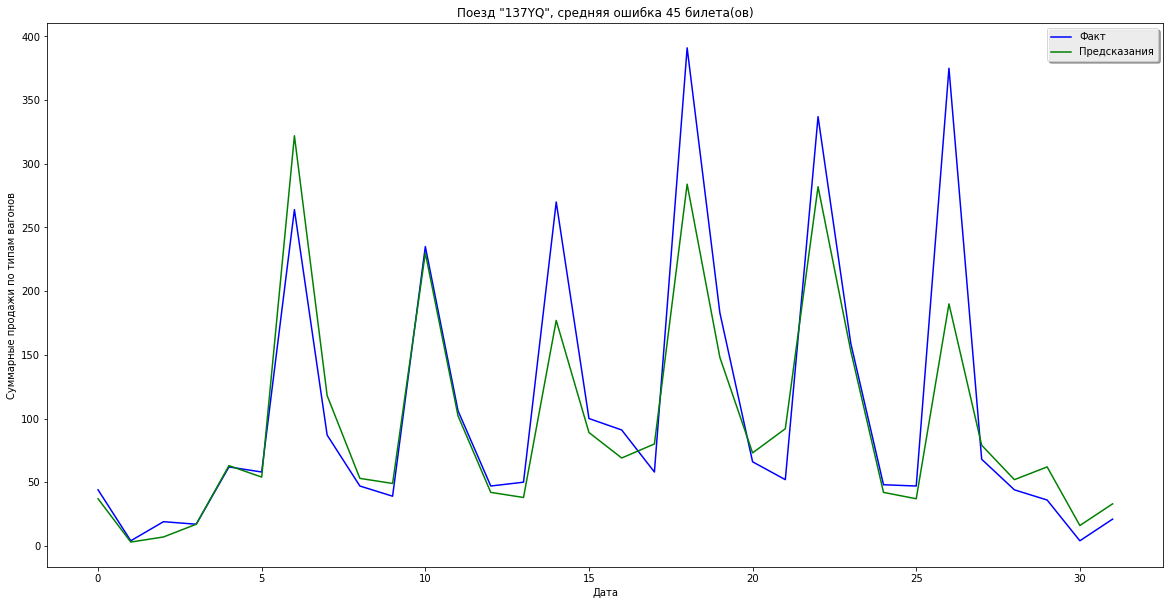

In [117]:
plt.figure(figsize=(20, 10))
fn = 7

x = np.arange(0, len(data[data.Date > '2017-03-15'][data.FltNr == fn]))
mse = np.sqrt(mean_squared_error(data[data.Date > '2017-03-15'][data.FltNr == fn].actual, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions))
print(mse)
plt.title('Поезд "137YQ", средняя ошибка ' + str(int(mse)) + ' билета(ов)')
plt.ylabel('Суммарные продажи по типам вагонов')
plt.xlabel('Дата')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].actual, 'b', label = 'Факт')
plt.plot(x, data[data.Date > '2017-03-15'][data.FltNr == fn].predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()

**337J, 102J**

In [59]:
# df = data[data.FltNr == 7].groupby(['FlightID', 'Date'])['actual', 'predictions'].sum()
# df.to_csv('10J.csv', sep=';')

4.22013315069


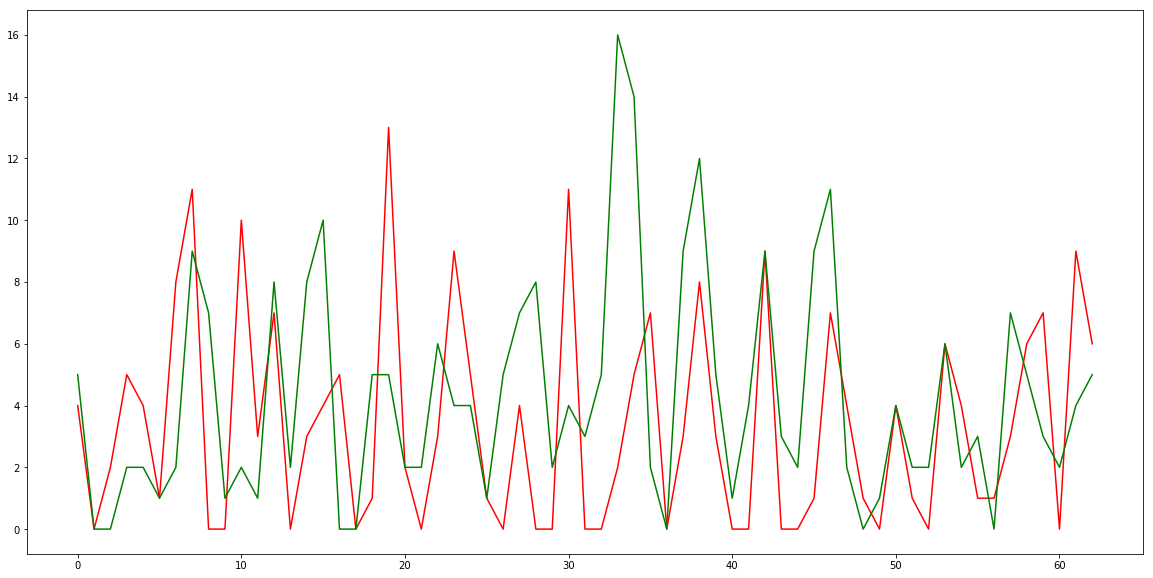

In [14]:
# plt.figure(figsize=(20, 10))
# fn = 4
# print(np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions)))
# x = np.arange(0, len(data[data.FltNr == fn].actual))
# plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

2.22361067735


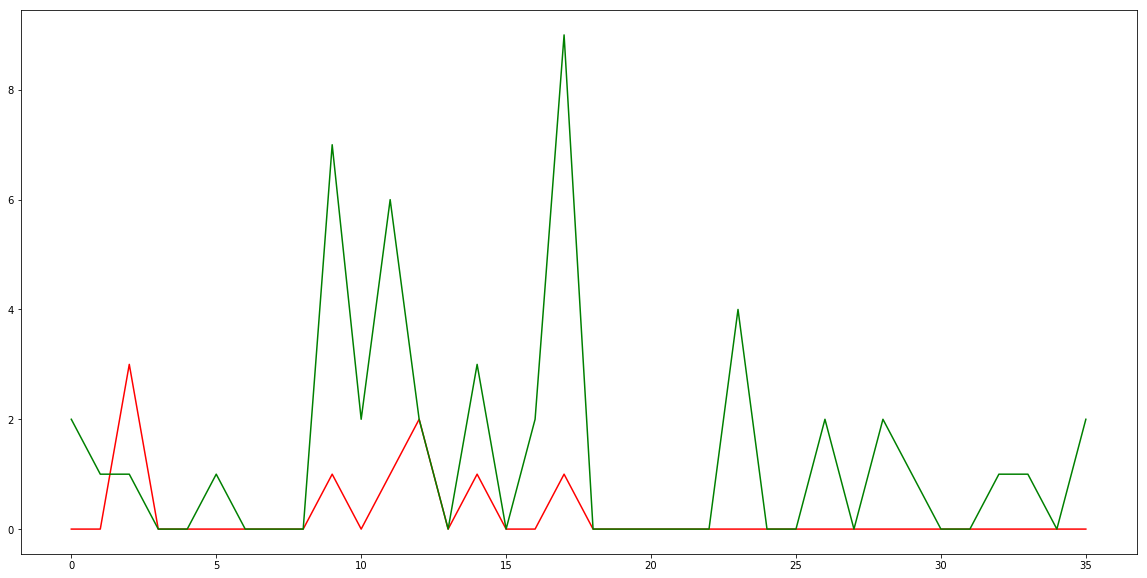

In [15]:
# plt.figure(figsize=(20, 10))
# fn = 8
# print(np.sqrt(mean_squared_error(data[data.FltNr == fn].actual, data[data.FltNr == fn].predictions)))
# x = np.arange(0, len(data[data.FltNr == fn].actual))
# plt.plot(x, data[data.FltNr == fn].actual, 'r', x, data[data.FltNr == fn].predictions, 'g')

**Общие**

In [118]:
res_ss = pd.DataFrame(columns = ("Date", "actual", "predictions"))
count = 0
for date in data[data.Date > '2017-03-15'].Date.unique():
    res_ss.loc[count] = (date, sum(data[~data.FltNr.isin([1, 3])].actual[data.Date == date]), sum(data[~data.FltNr.isin([1, 3])].predictions[data.Date == date]))
    count += 1

In [119]:
res_ss

,Date,actual,predictions
0,2017-03-16,706,610
1,2017-03-17,750,614
2,2017-03-18,917,991
3,2017-03-19,568,588
4,2017-03-20,916,915
5,2017-03-21,566,524
6,2017-03-22,807,645
7,2017-03-23,688,679
8,2017-03-24,1343,1153
9,2017-03-25,913,882


106.43718805


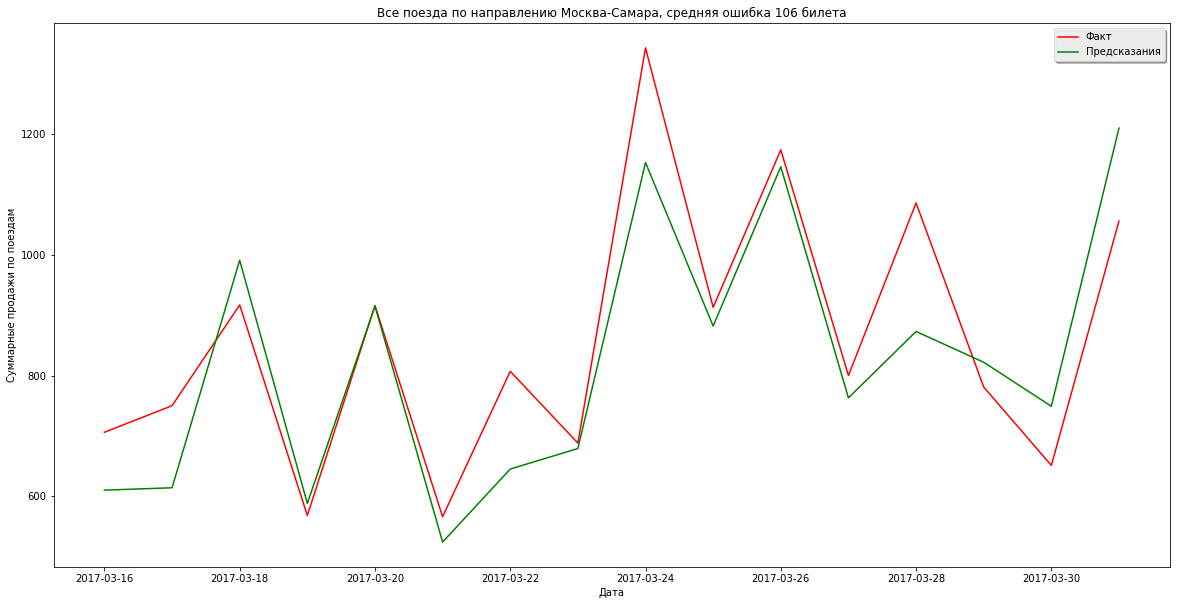

In [120]:
plt.figure(figsize=(20,10))
x = np.arange(0, len(res_ss.actual))
mse = np.sqrt(mean_squared_error(res_ss.actual, res_ss.predictions))
print(mse)
plt.title('Все поезда по направлению Москва-Самара, средняя ошибка ' + str(int(mse)) + ' билета')
plt.ylabel('Суммарные продажи по поездам')
plt.xlabel('Дата')
plt.plot(res_ss.Date, res_ss.actual, 'r', label = 'Факт')
plt.plot(res_ss.Date, res_ss.predictions, 'g', label = 'Предсказания')
plt.legend(shadow=True, fancybox=True)

plt.show()